重回帰分析(多変量の線形回帰分析)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston

In [4]:
dataset = load_boston()

In [5]:
x, t = dataset.data, dataset.target
columns = dataset.feature_names

In [6]:
type(x), x.shape

(numpy.ndarray, (506, 13))

In [7]:
type(t), t.shape

(numpy.ndarray, (506,))

In [8]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
df = pd.DataFrame(x, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df["target"] = t
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


sklearnで機械学習モデルを実装する際, numpyのndarray型に変換する必要(dataframeでも動くが,基本は変換)

In [11]:
t = df["target"].values

In [12]:
x = df.drop(labels=["target"], axis=1).values #axis=1 : 列方向に削除

学習データとテストデータに切り分け

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0) #30%をテストにする, random_state : 指定することで乱数のシードを固定→実行ごとに分割方法を同じにする

In [15]:
len(x_train) #全体 : 506行→正しく7割りの354行が割り当てられている

354

学習・精度の検証

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train, t_train)

LinearRegression()

学習により定まったパラメータを確認
重回帰分析 : 重みwとバイアスb, 各カラムに重みをかけ加算, その後バイアスを加算

In [19]:
model.coef_ #学習後のパラメータ

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

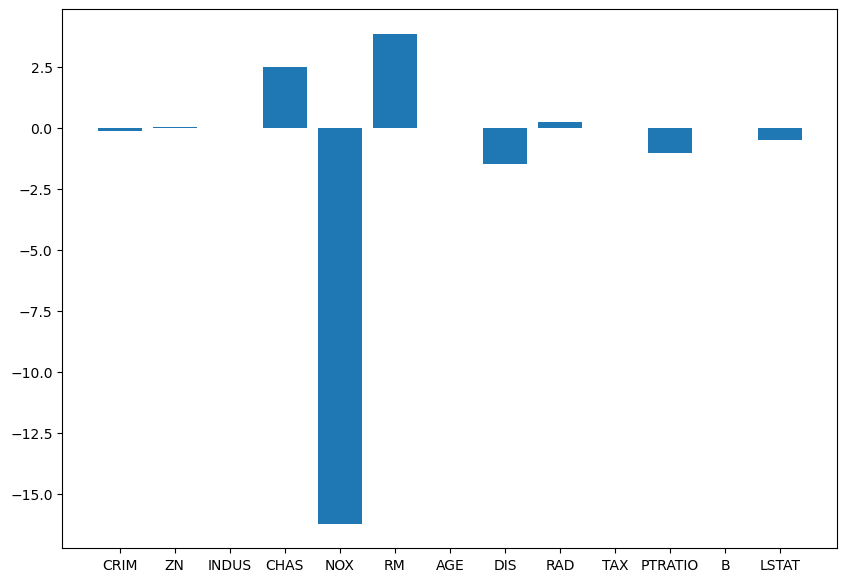

In [20]:
#重みの可視化
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax.bar(x=columns, height=model.coef_)
plt.show()

In [21]:
model.intercept_ #バイアスの確認

37.937107741832314

In [22]:
#決定係数 : 目標値と予測値の差を表した指標, 0 ~ 1の値で1に近いほど良い
print(f"train_score:{model.score(x_train, t_train)}")
print(f"test_score:{model.score(x_test, t_test)}")

train_score:0.7645451026942549
test_score:0.6733825506400205


推論

In [23]:
y = model.predict(x_test)

In [24]:
print(f"予測値:{y[0]}")
print(f"目標値:{t_test[0]}")

予測値:24.93570789857664
目標値:22.6


In [25]:
print(f"予測値:{y[1]}")
print(f"目標値:{t_test[1]}")

予測値:23.751631640748244
目標値:50.0


過学習の抑制

相関関係と多重共線性

In [26]:
df2 = pd.read_csv("regression_pls.csv")

In [32]:
df2.shape
df2.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,...,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,...,0,0,0,0,0,0,0,0,0,1


In [34]:
x, t = df2.drop("Target", axis=1).values, df2["Target"].values

In [36]:
t.shape

(1290,)

In [37]:
x.shape

(1290, 196)

In [38]:
x_train, x_test, t_train, t_test = train_test_split(x,t, test_size=0.3, random_state=0)

In [39]:
model = LinearRegression()

In [40]:
model.fit(x_train, t_train)

LinearRegression()

決定係数 : 多重共線性(入力変数同士の相関が強いものが含まれている)により過学習が起きている

In [41]:
#決定係数 : 目標値と予測値の差を表した指標, 0 ~ 1の値で1に近いほど良い
print(f"train_score:{model.score(x_train, t_train)}")
print(f"test_score:{model.score(x_test, t_test)}")

train_score:0.9365473062266819
test_score:-0.01691785330259088


入力変数の相関係数を調査

In [45]:
df2_corr = df2.corr() #データフレームの各カラムごとの相関係数を表示
df2_corr

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
Target,1.000000,-0.642326,-0.648078,-0.640489,-0.524453,NaN,0.111829,-0.360696,0.357026,0.113189,...,-0.032287,-0.015204,0.019244,-0.047169,NaN,0.007788,NaN,0.002448,-0.113820,0.043600
x1,-0.642326,1.000000,0.997571,0.999978,0.908895,NaN,0.322508,-0.117193,0.134074,0.298204,...,0.051291,0.186110,0.027947,-0.002219,NaN,0.001304,NaN,-0.015226,-0.038657,0.027857
x2,-0.648078,0.997571,1.000000,0.997252,0.883891,NaN,0.322631,-0.097297,0.115794,0.294947,...,0.047416,0.191792,0.029659,-0.007914,NaN,0.005912,NaN,-0.015106,-0.062823,0.027773
x3,-0.640489,0.999978,0.997252,1.000000,0.910855,NaN,0.324352,-0.120477,0.137237,0.300415,...,0.051542,0.186772,0.028046,-0.002001,NaN,0.001447,NaN,-0.015093,-0.038138,0.028359
x4,-0.524453,0.908895,0.883891,0.910855,1.000000,NaN,0.385792,-0.284647,0.293981,0.382603,...,0.044125,0.174983,0.022996,0.018780,NaN,-0.010834,NaN,-0.016378,0.027813,0.055553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x192,0.007788,0.001304,0.005912,0.001447,-0.010834,NaN,0.024306,-0.015943,0.014061,0.025697,...,-0.012022,0.067807,-0.005229,-0.007409,NaN,1.000000,NaN,-0.006191,-0.019703,0.023996
x193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x194,0.002448,-0.015226,-0.015106,-0.015093,-0.016378,NaN,-0.041735,0.036258,-0.038957,-0.042337,...,-0.010594,-0.014830,-0.004608,-0.006529,NaN,-0.006191,NaN,1.000000,-0.017362,-0.015667
x195,-0.113820,-0.038657,-0.062823,-0.038138,0.027813,NaN,0.009401,-0.077525,0.070936,0.019969,...,-0.009401,-0.034774,-0.014663,0.057135,NaN,-0.019703,NaN,-0.017362,1.000000,-0.040662


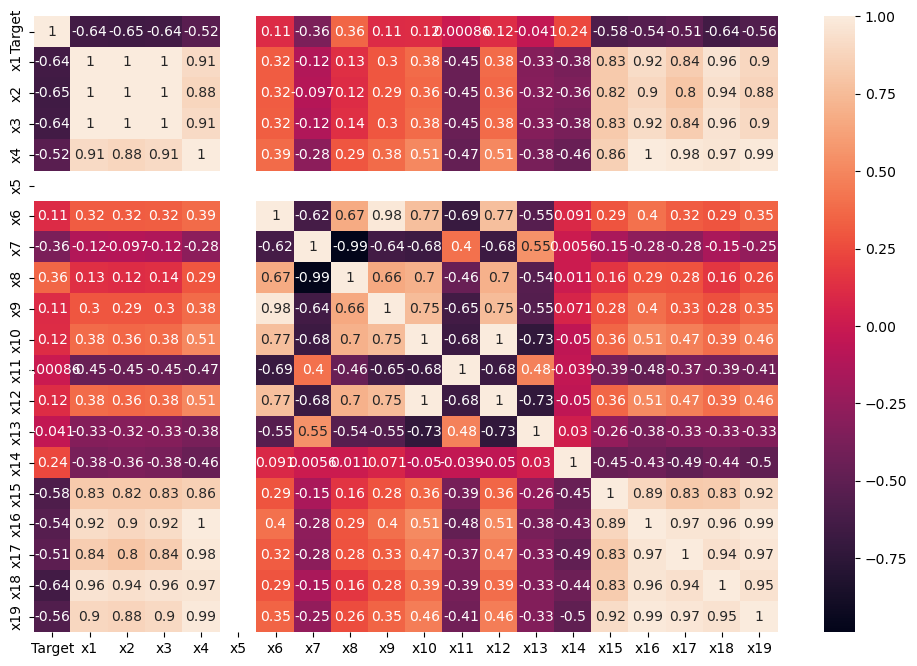

In [48]:
#相関係数のヒートマップ
figure = plt.figure(figsize=(12,8))
sns.heatmap(df2_corr.iloc[:20,:20], annot=True) #iloc : 最初の20成分のみ計算, annot : 数値の表示
plt.show()

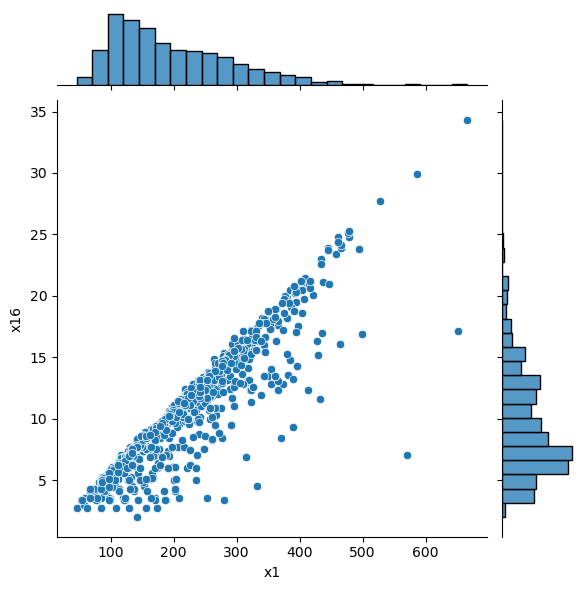

In [51]:
sns.jointplot(x="x1", y="x16", data=df2) #x1とx16の関係を表示
plt.show()

PLS : 多重共線性の解決手法アルゴリズム

In [52]:
from sklearn.cross_decomposition import PLSRegression

In [59]:
pls = PLSRegression(n_components=11) #n_components : 落とし込んだ後の次元数(ハイパーパラメータ) : 196成分→11成分に落とし込む

In [60]:
pls.fit(x_train, t_train)

PLSRegression(n_components=11)

先ほどよりtestの決定係数がかなり上がっている→多重共線性の解消による過学習の抑制を確認

In [61]:
#決定係数 : 目標値と予測値の差を表した指標, 0 ~ 1の値で1に近いほど良い
print(f"train_score:{pls.score(x_train, t_train)}")
print(f"test_score:{pls.score(x_test, t_test)}")

train_score:0.9157705245807128
test_score:0.8839475118318955
